In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import matplotlib.image as mpimg

In [2]:
train_path='./dataset/training_set/'
test_path='./dataset/test_set/'

In [3]:
# #Import required Image library
# from PIL import Image

# def reshape(im):    
#     #Make the new image half the width and half the height of the original image
#     resized_im = im.resize((200, 200))
    
#     #Display the resized imaged
#     arr=np.asarray(resized_im)
#     return arr
# def load_data():
#     X=[]
#     Y=[]
#     #img=mpimg.imread(train_path+'dogs/dog.1.jpg')
#     for img in os.listdir(train_path+'dogs'):
#         if os.path.isfile(os.path.join(train_path+'dogs', img)) and img.endswith(".jpg"):
#             path=train_path+'dogs/'+img
#             im=Image.open(path)
#             ar=reshape(im)
#             arr=np.array(ar,dtype='float')
#             arr/=255
#             X.append(arr)
#             Y.append(0)
#     for img in os.listdir(train_path+'cats'):
#         if os.path.isfile(os.path.join(train_path+'cats', img)) and img.endswith(".jpg"):
#             path=train_path+'cats/'+img
#             im=Image.open(path)
#             ar=reshape(im)
#             arr=np.array(ar,dtype='float')
#             arr/=255
#             X.append(arr)
#             Y.append(1)
#     return np.array(X),np.asarray(Y,dtype='int')

In [4]:
import os,os.path
train_dog_size=len([name for name in os.listdir(train_path+'dogs') if os.path.isfile(os.path.join(train_path+'dogs', name))])
train_cat_size=len([name for name in os.listdir(train_path+'cats') if os.path.isfile(os.path.join(train_path+'cats', name))])

print("Dog Training Set Size:",train_dog_size-1)
print("Cat Training Set Size:",train_cat_size-1)

test_dog_size=len([name for name in os.listdir(test_path+'dogs') if os.path.isfile(os.path.join(test_path+'dogs', name))])
test_cat_size=len([name for name in os.listdir(test_path+'cats') if os.path.isfile(os.path.join(test_path+'cats', name))])

print("Dog Test Set Size:",test_dog_size-1)
print("Cat Test Set Size:",test_cat_size-1)

Dog Training Set Size: 4055
Cat Training Set Size: 4050
Dog Test Set Size: 1032
Cat Test Set Size: 1011


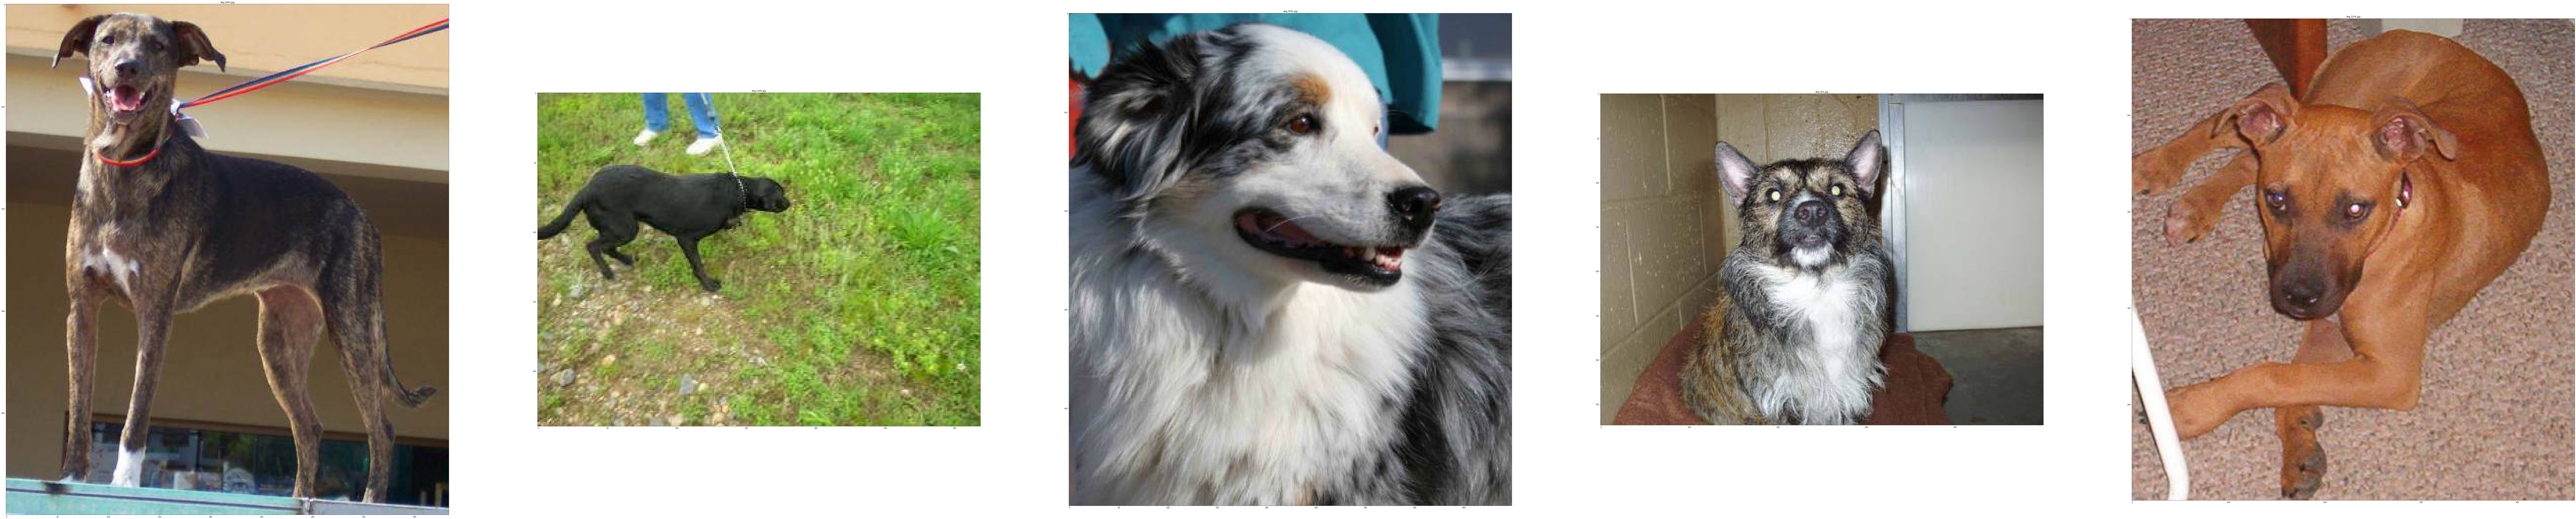

In [5]:
import random
plt.figure(figsize=(256,256))
for i in range(5):
    file = random.choice(os.listdir(train_path+'dogs'))
    image_path= os.path.join(train_path+'dogs', file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [6]:
from keras.preprocessing.image import ImageDataGenerator as idg
from keras.preprocessing import image_dataset_from_directory

In [47]:
#load images and data augmentation
#train_datagen=idg(rescale=1./255,horizontal_flip=True,validation_split=0.1)
batch_size=32
image_size=(64,64)
train_ds=image_dataset_from_directory(train_path,labels="inferred",label_mode='categorical',batch_size=batch_size,image_size=image_size,color_mode="rgb",validation_split=0.1,subset='training',seed=1337)
#train_it=train_datagen.flow_from_directory(train_path,class_mode='categorical',batch_size=64,target_size=(256, 256))
val_ds=image_dataset_from_directory(train_path,labels="inferred",label_mode='categorical',batch_size=batch_size,image_size=image_size,color_mode="rgb",validation_split=0.1,subset='validation',seed=1337)

#test iterator
test_ds=idg(rescale=1./255)
test_it=test_ds.flow_from_directory(test_path,class_mode='categorical')

Found 8105 files belonging to 2 classes.
Using 7295 files for training.
Found 8105 files belonging to 2 classes.
Using 810 files for validation.
Found 2043 images belonging to 2 classes.


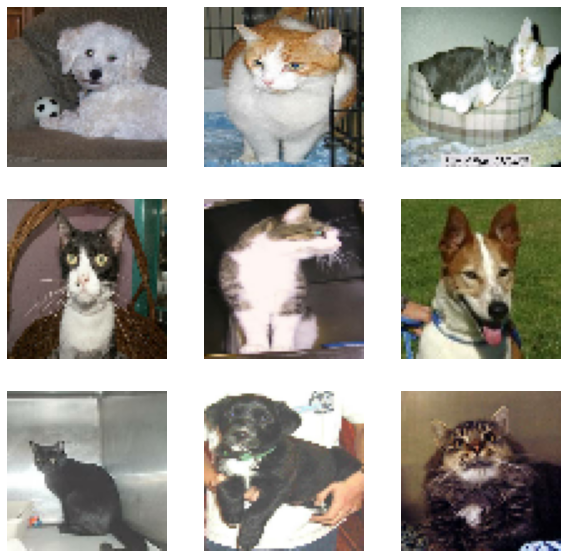

In [48]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i
                         + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        #plt.title((labels[i]))
        plt.axis("off")

In [49]:
#Let's make sure to use buffered prefetching so we can yield data from disk without having I/O becoming blocking:

train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

In [50]:
from keras import Sequential
from keras.optimizers import Adam
from keras.layers import Dropout,BatchNormalization,Conv2D,Flatten,MaxPool2D,Dense

In [51]:
model=Sequential([
    Conv2D(32,kernel_size=(3,3),input_shape=(64,64,3),padding="same",activation='relu'),
    MaxPool2D(pool_size=(3, 3), strides=1, padding="same"),
    BatchNormalization(),
    Conv2D(16,kernel_size=(2,2),activation='relu',padding="valid"),
    MaxPool2D(pool_size=(2, 2), strides=1, padding="valid"),
    BatchNormalization(),
    Dropout(0.3),    
    Flatten(),
    Dense(16,activation='relu'),
    Dropout(0.2),
    Dense(2,activation='softmax')]
)

In [52]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 63, 63, 16)        2064      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 62, 62, 16)        0         
_________________________________________________________________
batch_normalization_21 (Batc (None, 62, 62, 16)        64        
_________________________________________________________________
dropout_20 (Dropout)         (None, 62, 62, 16)      

In [53]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])

In [54]:
model.fit(train_ds,validation_data=val_ds,epochs=50,verbose=1)

Epoch 1/50
228/228 [==============================] - 200s 866ms/step - loss: 0.7848 - accuracy: 0.6077 - val_loss: 0.5734 - val_accuracy: 0.7235
Epoch 2/50
228/228 [==============================] - 183s 801ms/step - loss: 0.5340 - accuracy: 0.7281 - val_loss: 0.5524 - val_accuracy: 0.7247
Epoch 3/50
228/228 [==============================] - 189s 824ms/step - loss: 0.4564 - accuracy: 0.7711 - val_loss: 0.5321 - val_accuracy: 0.7383
Epoch 4/50
228/228 [==============================] - 188s 819ms/step - loss: 0.3676 - accuracy: 0.8343 - val_loss: 0.5442 - val_accuracy: 0.7407
Epoch 5/50
228/228 [==============================] - 161s 701ms/step - loss: 0.3217 - accuracy: 0.8476 - val_loss: 0.5302 - val_accuracy: 0.7494
Epoch 6/50
228/228 [==============================] - 142s 621ms/step - loss: 0.2627 - accuracy: 0.8841 - val_loss: 0.5648 - val_accuracy: 0.7568
Epoch 7/50
228/228 [==============================] - 146s 638ms/step - loss: 0.2188 - accuracy: 0.9108 - val_loss: 0.6156 -

In [56]:
model.save('model1-wo aug')

INFO:tensorflow:Assets written to: model1-wo aug\assets
